In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
import numpy as np


In [81]:
file_path = 'Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

# Вывод первых нескольких строк данных
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [84]:
column_names = data.columns
print(column_names)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [54]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f'"{column}" имеет вид {unique_values}')

"customerID" имеет вид ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
"gender" имеет вид ['Female' 'Male']
"SeniorCitizen" имеет вид [0 1]
"Partner" имеет вид ['Yes' 'No']
"Dependents" имеет вид ['No' 'Yes']
"tenure" имеет вид [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
"PhoneService" имеет вид ['No' 'Yes']
"MultipleLines" имеет вид ['No phone service' 'No' 'Yes']
"InternetService" имеет вид ['DSL' 'Fiber optic' 'No']
"OnlineSecurity" имеет вид ['No' 'Yes' 'No internet service']
"OnlineBackup" имеет вид ['Yes' 'No' 'No internet service']
"DeviceProtection" имеет вид ['No' 'Yes' 'No internet service']
"TechSupport" имеет вид ['No' 'Yes' 'No internet service']
"StreamingTV" имеет вид ['No' 'Yes' 'No internet service']
"StreamingMovies" имеет вид ['No' 'Yes' 'No internet ser

In [43]:
#преобразуем данные
data['PhoneService'] = data['PhoneService'].replace({'No': 0,
                                         'Yes': 1})
data['gender'] = data['gender'].replace({'Female': 0,
                                         'Male': 1})
data['Partner'] = data['Partner'].replace({'No': 0,
                                           'Yes': 1})
data['Dependents'] = data['Dependents'].replace({'No': 0,
                                                 'Yes': 1})
data['MultipleLines'] = data['MultipleLines'].replace({'No': 0, 
                                                       'Yes': 1,
                                                       'No phone service': 2})
data['InternetService'] = data['InternetService'].replace({'DSL': 0,
                                                           'Fiber optic': 1,
                                                           'No': 2})
data['OnlineSecurity'] = data['OnlineSecurity'].replace({'No': 0,
                                                         'Yes': 1,
                                                         'No internet service': 2})
data['OnlineBackup'] = data['OnlineBackup'].replace({'No': 0,
                                                     'Yes': 1,
                                                     'No internet service': 2})
data['DeviceProtection'] = data['DeviceProtection'].replace({'No': 0,
                                                             'Yes': 1,
                                                             'No internet service': 2})
data['TechSupport'] = data['TechSupport'].replace({'No': 0,
                                                   'Yes': 1,
                                                   'No internet service': 2})
data['StreamingTV'] = data['StreamingTV'].replace({'No': 0,
                                                   'Yes': 1,
                                                   'No internet service': 2})
data['StreamingMovies'] = data['StreamingMovies'].replace({'No': 0,
                                                           'Yes': 1,
                                                           'No internet service': 2})
data['Contract'] = data['Contract'].replace({'Month-to-month': 0,
                                             'One year': 1,
                                             'Two year': 2})
data['PaperlessBilling'] = data['PaperlessBilling'].replace({'No': 0,
                                                             'Yes': 1})
data['PaymentMethod'] = data['PaymentMethod'].replace({'Electronic check': 0, 
                                                       'Mailed check': 1, 
                                                       'Bank transfer (automatic)': 1,
                                                       'Credit card (automatic)': 1})
data['Churn'] = data['Churn'].replace({'No': 0,
                                       'Yes': 1})

data['TotalCharges'] = data['TotalCharges'].replace(' ', '0') 
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [44]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f'"{column}" имеет вид {unique_values}')

"customerID" имеет вид ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
"gender" имеет вид [0 1]
"SeniorCitizen" имеет вид [0 1]
"Partner" имеет вид [1 0]
"Dependents" имеет вид [0 1]
"tenure" имеет вид [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
"PhoneService" имеет вид [0 1]
"MultipleLines" имеет вид [2 0 1]
"InternetService" имеет вид [0 1 2]
"OnlineSecurity" имеет вид [0 1 2]
"OnlineBackup" имеет вид [1 0 2]
"DeviceProtection" имеет вид [0 1 2]
"TechSupport" имеет вид [0 1 2]
"StreamingTV" имеет вид [0 1 2]
"StreamingMovies" имеет вид [0 1 2]
"Contract" имеет вид [0 1 2]
"PaperlessBilling" имеет вид [1 0]
"PaymentMethod" имеет вид [0 1]
"MonthlyCharges" имеет вид [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
"TotalCharges" имеет вид [  29.85 1889.5   108.15 ...  346.45  306

In [45]:
assessment_table = pd.DataFrame({
    'Параметр': data.columns,
    'Тип данных': data.dtypes,
    'Минимальное значение': data.min(),
    'Максимальное значение': data.max()
})
print(assessment_table)

                          Параметр Тип данных Минимальное значение  \
customerID              customerID     object           0002-ORFBO   
gender                      gender      int64                    0   
SeniorCitizen        SeniorCitizen      int64                    0   
Partner                    Partner      int64                    0   
Dependents              Dependents      int64                    0   
tenure                      tenure      int64                    0   
PhoneService          PhoneService      int64                    0   
MultipleLines        MultipleLines      int64                    0   
InternetService    InternetService      int64                    0   
OnlineSecurity      OnlineSecurity      int64                    0   
OnlineBackup          OnlineBackup      int64                    0   
DeviceProtection  DeviceProtection      int64                    0   
TechSupport            TechSupport      int64                    0   
StreamingTV         

In [46]:
def show_percentage_by_parameter(number):
    first_parameter = data.columns[number]
    unique_values = data[first_parameter].unique()
    values = []
    churn_0_percentages = []
    churn_1_percentages = []
    for value in unique_values:
        total_count = len(data[data[first_parameter] == value])
        churn_0_count = len(data[(data[first_parameter] == value) & (data['Churn'] == 0)])
        churn_1_count = len(data[(data[first_parameter] == value) & (data['Churn'] == 1)])
        values.append(value)
        churn_0_percentages.append(churn_0_count / total_count * 100)
        churn_1_percentages.append(churn_1_count / total_count * 100)
    
    # Создание таблицы pandas для первого параметра
    result_table = pd.DataFrame({
        'Parameter': [first_parameter] * len(unique_values),
        'Value': values,
        'not churn': churn_0_percentages,
        'churn': churn_1_percentages
    })
    print(f"There is research about: {first_parameter}")
    print(result_table)
    print("\n")


show_percentage_by_parameter(1)
show_percentage_by_parameter(2)
show_percentage_by_parameter(3)
show_percentage_by_parameter(4)
show_percentage_by_parameter(6)
show_percentage_by_parameter(7)
show_percentage_by_parameter(8)
show_percentage_by_parameter(9)
show_percentage_by_parameter(10)
show_percentage_by_parameter(11)
show_percentage_by_parameter(12)
show_percentage_by_parameter(13)
show_percentage_by_parameter(14)
show_percentage_by_parameter(15)
show_percentage_by_parameter(16)
show_percentage_by_parameter(17)
show_percentage_by_parameter(20)

There is research about: gender
  Parameter  Value  not churn      churn
0    gender      0  73.079128  26.920872
1    gender      1  73.839662  26.160338


There is research about: SeniorCitizen
       Parameter  Value  not churn      churn
0  SeniorCitizen      0  76.393832  23.606168
1  SeniorCitizen      1  58.318739  41.681261


There is research about: Partner
  Parameter  Value  not churn      churn
0   Partner      1  80.335097  19.664903
1   Partner      0  67.042021  32.957979


There is research about: Dependents
    Parameter  Value  not churn      churn
0  Dependents      0  68.720860  31.279140
1  Dependents      1  84.549763  15.450237


There is research about: PhoneService
      Parameter  Value  not churn      churn
0  PhoneService      0  75.073314  24.926686
1  PhoneService      1  73.290363  26.709637


There is research about: MultipleLines
       Parameter  Value  not churn      churn
0  MultipleLines      2  75.073314  24.926686
1  MultipleLines      0  74.95575

Electronic check
Mailed check
Bank transfer (automatic)
Credit card (automatic)


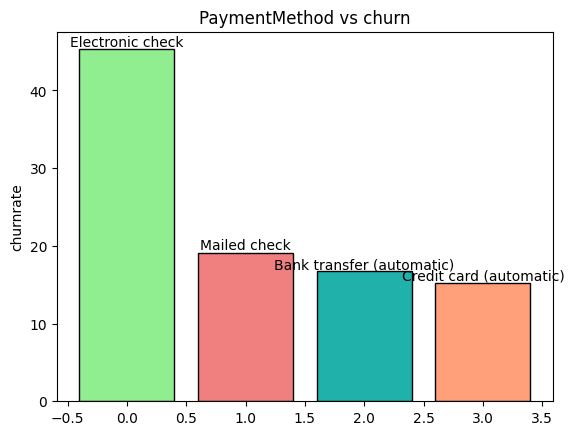

In [68]:
def show_plot_percentage_by_parameter(number):
    first_parameter = data.columns[number]
    unique_values = data[first_parameter].unique()
    values = []
    churn_0_percentages = []
    churn_1_percentages = []
    for value in unique_values:
        total_count = len(data[data[first_parameter] == value])
        churn_1_count = len(data[(data[first_parameter] == value) & (data['Churn'] == 1)])
        values.append(value)
        churn_1_percentages.append(churn_1_count / total_count * 100)
    
    x_indexes = range(len(churn_1_percentages))
    
    # Создание гистограммы
    colors = ['lightgreen', 'lightcoral', 'lightseagreen', 'lightsalmon', 'gold', 'lightpink']
    plt.bar(x_indexes, churn_1_percentages, color=colors, edgecolor='black')
    
    # Добавление меток значений параметра value
    for i, value in enumerate(values):
        print(value)
        plt.text(i, churn_1_percentages[i], str(value), ha='center', va='bottom')

    # Настройка осей и заголовка
    plt.ylabel(f"churnrate")
    plt.title(f"{first_parameter} vs churn")

    # Показать график
    plt.show()

show_plot_percentage_by_parameter(17)

99


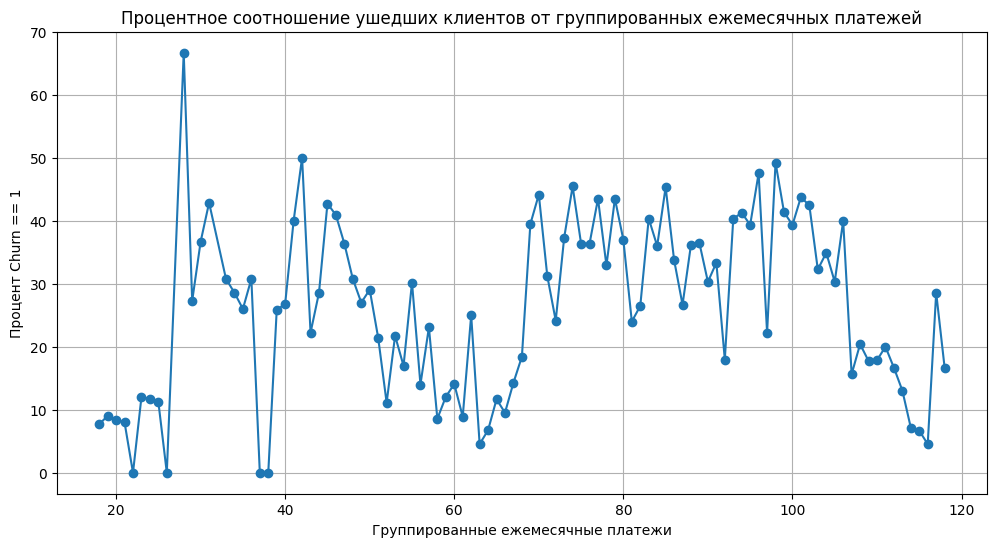

In [34]:
grouped_data = data.groupby(data['MonthlyCharges'] // 1)['Churn'].mean().reset_index()
print(len(grouped_data))

# Построение графика
plt.figure(figsize=(12,6))
plt.plot(grouped_data['MonthlyCharges'], grouped_data['Churn']*100, marker='o')
plt.title('Процентное соотношение ушедших клиентов от группированных ежемесячных платежей')
plt.xlabel('Группированные ежемесячные платежи')
plt.ylabel('Процент Churn == 1')
plt.grid(True)
plt.show()

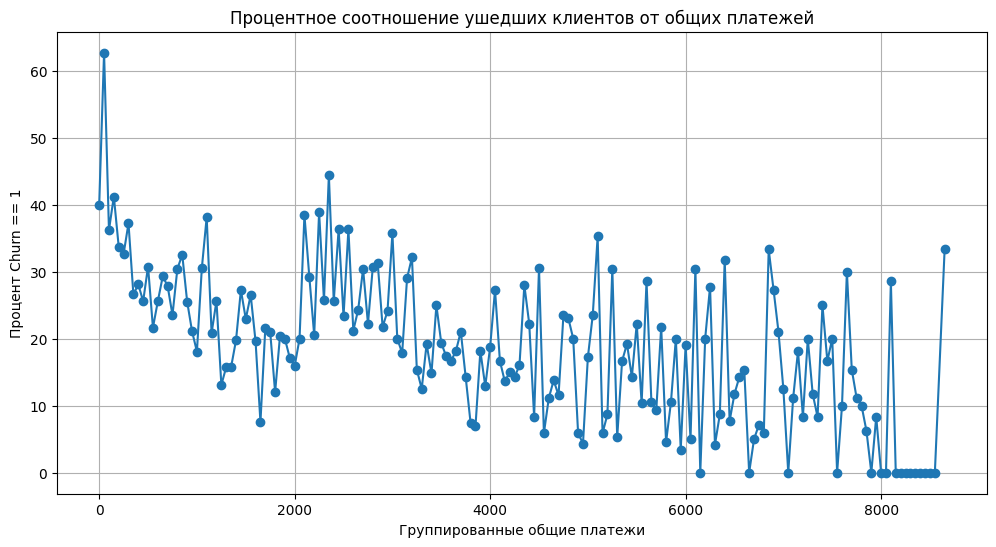

In [35]:
grouped_data = data.groupby(data['TotalCharges'] // 50 * 50)['Churn'].mean().reset_index()

# Построение графика
plt.figure(figsize=(12,6))
plt.plot(grouped_data['TotalCharges'], grouped_data['Churn']*100, marker='o')
plt.title('Процентное соотношение ушедших клиентов от общих платежей')
plt.xlabel('Группированные общие платежи')
plt.ylabel('Процент Churn == 1')
plt.grid(True)
plt.show()

In [36]:
Data_val = data.values
print(Data_val[4])

customers = []
labels = []
for data in Data_val:
    customer = data[1:-1] 
    customers.append(customer)
    labels.append(data[-1])

print(customers[4])
print(labels[4])

['9237-HQITU' 0 0 0 0 2 1 0 1 0 0 0 0 0 0 0 1 0 70.7 151.65 1]
[0 0 0 0 2 1 0 1 0 0 0 0 0 0 0 1 0 70.7 151.65]
1


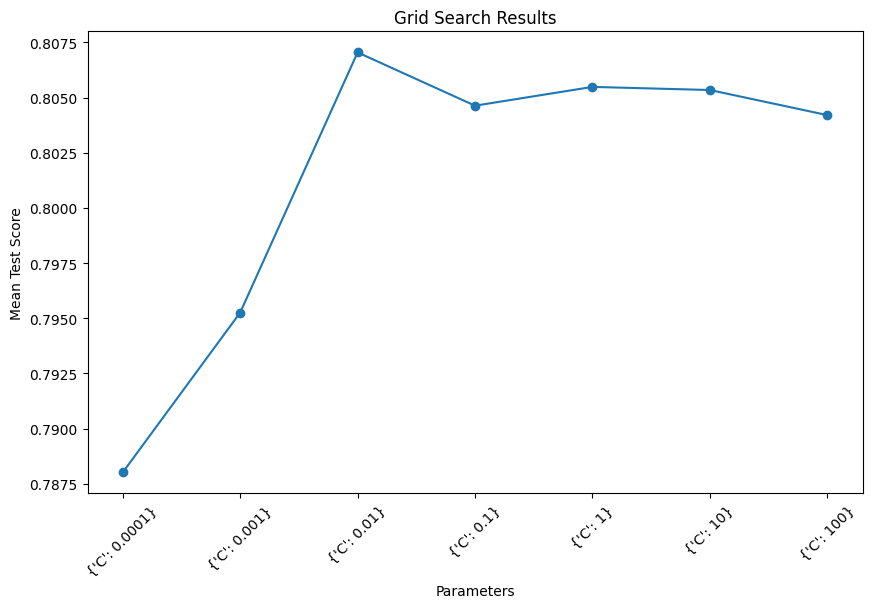

In [37]:
# lets try logistic regression

parameters = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

X_train, X_test, y_train, y_test = train_test_split(customers, labels, test_size=0.2, random_state=42)
lr = LogisticRegression(max_iter = 1000)


grid_search = GridSearchCV(lr, parameters)
grid_search.fit(customers, labels)


means = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']


plt.figure(figsize=(10, 6))
plt.plot(range(len(means)), means, marker='o')
plt.xticks(range(len(means)), [str(param) for param in params], rotation=45)
plt.title('Grid Search Results')
plt.xlabel('Parameters')
plt.ylabel('Mean Test Score')
plt.show()

In [43]:
best_params = grid_search.best_params_

# Создание модели с лучшими параметрами
best_model = LogisticRegression(C=best_params['C'], max_iter = 1000)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
train_pred = best_model.predict(X_train)

print("Отчёт о классификации:")
print(classification_report(y_test, y_pred))


accuracy_1 = accuracy_score(y_test, y_pred)
accuracy_2 = accuracy_score(y_train, train_pred)
print(f"Accuracy: {accuracy_1} {accuracy_2} ")


Отчёт о классификации:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.82      1409

Accuracy: 0.8204400283889283 0.8054668086616968 


In [54]:
parameters = {'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 6]}

tree_model = DecisionTreeClassifier()


grid_search_tree = GridSearchCV(tree_model, parameters)
grid_search_tree.fit(X_train, y_train)


best_params_tree = grid_search_tree.best_params_
print(best_params_tree)

best_tree_model = DecisionTreeClassifier(max_depth=best_params_tree['max_depth'], min_samples_split=best_params_tree['min_samples_split'], min_samples_leaf=best_params_tree['min_samples_leaf'])
best_tree_model.fit(X_train, y_train)


train_predictions = best_tree_model.predict(X_train)
test_predictions = best_tree_model.predict(X_test)


train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Точность на обучающих данных: {train_accuracy}")
print(f"Точность на тестовых данных: {test_accuracy}")

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Точность на обучающих данных: 0.8003194888178914
Точность на тестовых данных: 0.7977288857345636


In [56]:


parameters_rf = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 4]}


rf_model = RandomForestClassifier()


grid_search_rf = GridSearchCV(rf_model, parameters_rf)
grid_search_rf.fit(X_train, y_train)


best_params_rf = grid_search_rf.best_params_
print(best_params_rf)


best_rf_model = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'], max_depth=best_params_rf['max_depth'], min_samples_split=best_params_rf['min_samples_split'], min_samples_leaf=best_params_rf['min_samples_leaf'])
best_rf_model.fit(X_train, y_train)


train_predictions_rf = best_rf_model.predict(X_train)
test_predictions_rf = best_rf_model.predict(X_test)


train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)

print(f"Точность на обучающих данных для случайного леса: {train_accuracy_rf}")
print(f"Точность на тестовых данных для случайного леса: {test_accuracy_rf}")

{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Точность на обучающих данных для случайного леса: 0.8432729854455094
Точность на тестовых данных для случайного леса: 0.8126330731014905


In [23]:
best_gb_model = GradientBoostingClassifier(n_estimators=100, 
                                            learning_rate=0.5,
                                           max_depth=9,
                                           min_samples_split=2,
                                           min_samples_leaf=4)
best_gb_model.fit(X_train, y_train)


train_predictions_gb = best_gb_model.predict(X_train)
test_predictions_gb = best_gb_model.predict(X_test)


train_accuracy_gb = accuracy_score(y_train, train_predictions_gb)
test_accuracy_gb = accuracy_score(y_test, test_predictions_gb)

print(f"Точность на обучающих данных для градиентного бустинга: {train_accuracy_gb}")
print(f"Точность на тестовых данных для градиентного бустинга: {test_accuracy_gb}")

Точность на обучающих данных для градиентного бустинга: 0.9982250621228257
Точность на тестовых данных для градиентного бустинга: 0.7721788502484032


In [103]:
print(f"Точность на обучающих данных для градиентного бустинга: {train_accuracy_gb}")
print(f"Точность на тестовых данных для градиентного бустинга: {test_accuracy_gb}")
print("Classification report: ")
print(classification_report(y_test, test_predictions_gb))

Точность на обучающих данных для градиентного бустинга: 0.9982250621228257
Точность на тестовых данных для градиентного бустинга: 0.7721788502484032
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1036
           1       0.58      0.50      0.54       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409



In [92]:
best_rf_model = RandomForestClassifier(n_estimators=100, max_depth=9, min_samples_split=2, min_samples_leaf=4)
best_rf_model.fit(X_train, y_train)


train_predictions_rf = best_rf_model.predict(X_train)
test_predictions_rf = best_rf_model.predict(X_test)


train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)

print(f"Accuracy with train data: {train_accuracy_rf}")
print(f"Accuracy with test data: {test_accuracy_rf}")

best_rf_model.fit(customers, labels)

predictions = best_rf_model.predict(customers)
test_accuracy = accuracy_score(labels, predictions)

print(f"Accuracy of full trained data: {test_accuracy}")
print("Classification report: ")
print(classification_report(y_test, test_predictions_rf))



Accuracy with train data: 0.8409655662051828
Accuracy with test data: 0.8090844570617459
Accuracy of full trained data: 0.8425386908987648
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



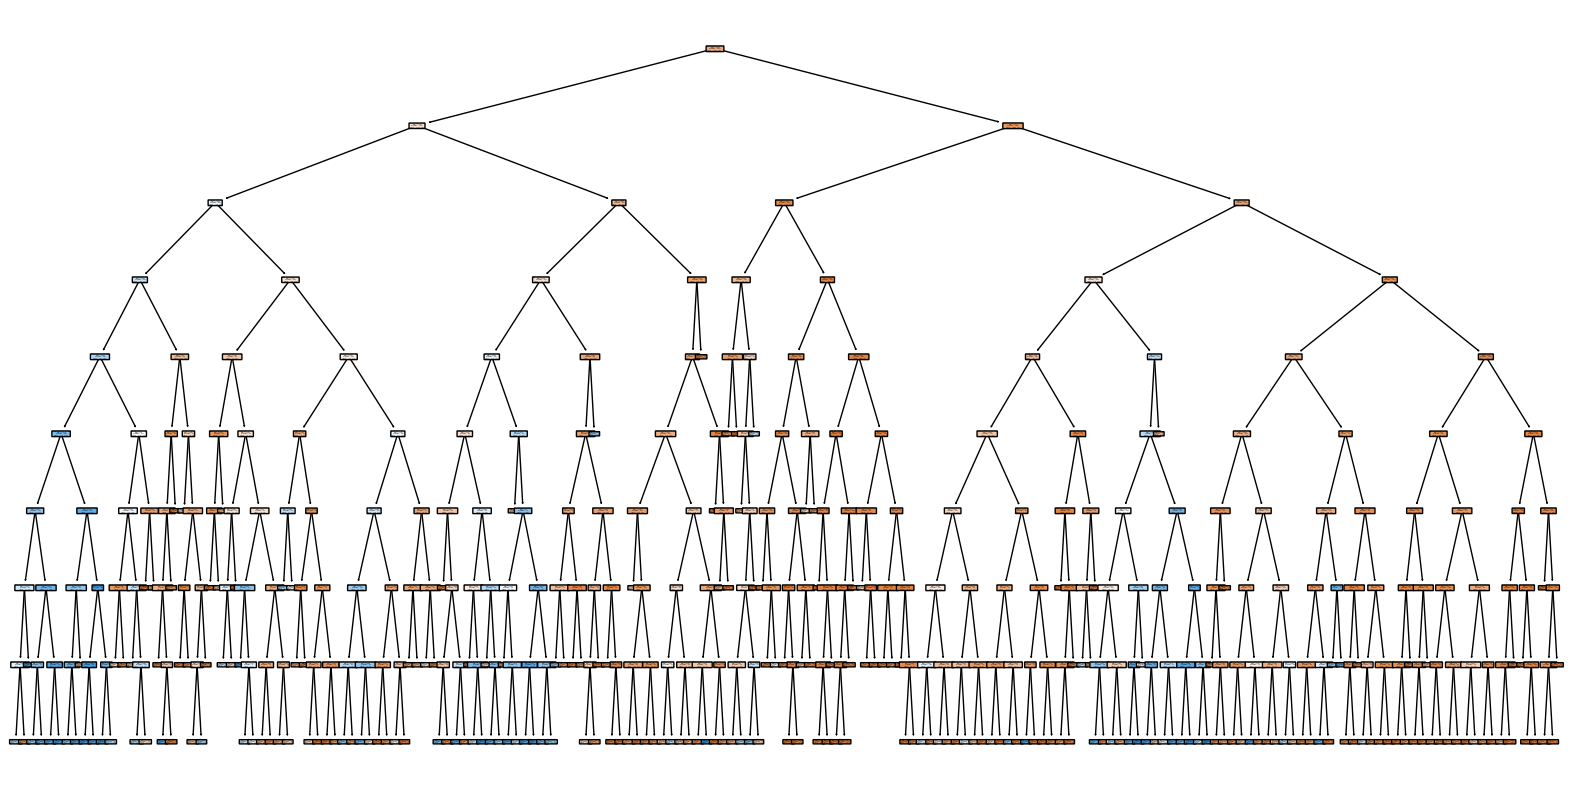

In [93]:
tree = best_rf_model.estimators_[0]
names = list(data.columns[1:-1])

# Визуализация дерева
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=names, filled=True, rounded=True)
plt.show()

Feature ranking:
1. feature tenure (0.17435352710443666)
2. feature Contract (0.1621847170207667)
3. feature TotalCharges (0.13179687026594816)
4. feature MonthlyCharges (0.12214747689679695)
5. feature OnlineSecurity (0.08470847452971345)
6. feature TechSupport (0.06280488292227167)
7. feature PaymentMethod (0.058515441994877286)
8. feature InternetService (0.04205253993814636)
9. feature OnlineBackup (0.026866841322745832)
10. feature DeviceProtection (0.020477883120982285)
11. feature StreamingMovies (0.01914978714531622)
12. feature StreamingTV (0.018192660509611054)
13. feature MultipleLines (0.0166215991263594)
14. feature PaperlessBilling (0.01651459404516279)
15. feature gender (0.010740337453001037)
16. feature SeniorCitizen (0.009959894784733558)
17. feature Dependents (0.009776390014758348)
18. feature Partner (0.009371369236855219)
19. feature PhoneService (0.0037647125675172024)


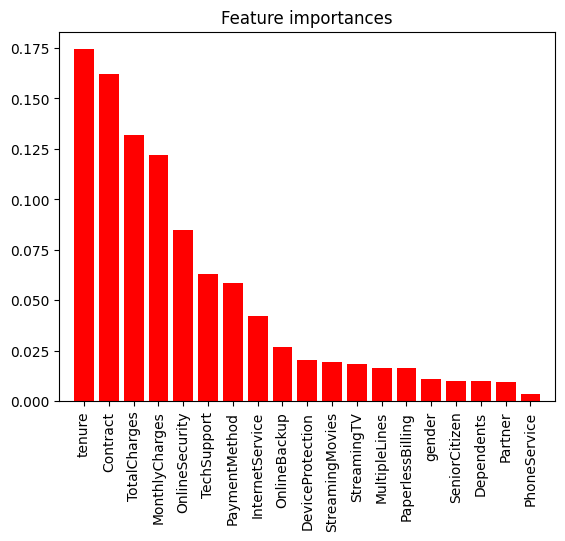

In [102]:
customers = np.array(customers)
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Распечатка значимости функций
print("Feature ranking:")
for f in range(customers.shape[1]):
    print(f"{f + 1}. feature {names[indices[f]]} ({importances[indices[f]]})")

# Визуализация значимости функций
plt.figure()
plt.title("Feature importances")
plt.bar(range(customers.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(customers.shape[1]), [names[i] for i in indices], rotation=90)
plt.xlim([-1, customers.shape[1]])
plt.show()